We have a large database of possible hex maze configs.
Each config has a set of attributes that we may want to use as keys in a lookup:
- length of optimal path from port 1 to 2
- length of optimal path from port 1 to 3
- length of optimal path from port 2 to 3
- difference in optimal path lengths
- number of critical choice points
- the choice point(s) themselves
- the optimal paths themselves (for each port pair)
- one big list of all optimal paths
    - could be useful to get mazes with the same (or not) set of all optimal paths - sort out mazes that are "unique" but only differ in trivial ways

Not yet added but maybe:
- number of cycles (?)
- dead ends (?)
    - number of dead ends? dead end hexes? dead end lengths? dead end paths? 


Also want to look up:
- set of barriers that differs by 1 barrier from a given set
- (with path lengths different?)


In [1]:
import pickle

# Load our saved set of good mazes
with open('set_of_good_mazes.pkl', 'rb') as file:
    good_mazes = pickle.load(file)

print("Number of good mazes in our database:", len(good_mazes))

Number of good mazes in our database: 28586


In [2]:
import networkx as nx
from hex_maze_utils import *

def create_maze_graph(barrier_set):
    '''
    Given a set of barriers defining a hex maze configuration, 
    return a networkx graph object representing the maze.
    '''
    
    # Create a new empty hex maze object
    maze_graph = create_hex_maze()
    
    # Remove the barriers
    for barrier in barrier_set:
        maze_graph.remove_node(barrier)
    return maze_graph


def get_maze_attributes(barrier_set):
    '''
    Given a set of barriers defining a maze, create a dictionary of attributes for that maze.
    
    Returns: a dictionary of maze attributes
    '''
    
    # Get the graph representation of the maze for us to do calculations on
    maze = create_maze_graph(barrier_set)

    # Get length of optimal paths between reward ports
    len12 = nx.shortest_path_length(maze, source=1, target=2)+1
    len13 = nx.shortest_path_length(maze, source=1, target=3)+1
    len23 = nx.shortest_path_length(maze, source=2, target=3)+1
    reward_path_lengths = [len12, len13, len23]
    path_length_difference = max(reward_path_lengths) - min(reward_path_lengths)
    
    # Get the optimal paths between reward ports
    optimal_paths_12 = list(nx.all_shortest_paths(maze, source=1, target=2))
    optimal_paths_13 = list(nx.all_shortest_paths(maze, source=1, target=3))
    optimal_paths_23 = list(nx.all_shortest_paths(maze, source=2, target=3))
    optimal_paths_all = []
    optimal_paths_all.extend(optimal_paths_12)
    optimal_paths_all.extend(optimal_paths_13)
    optimal_paths_all.extend(optimal_paths_23)
    
    # Get critical choice points
    choice_points = set(find_all_critical_choice_points(maze))
    num_choice_points = len(choice_points)
    
    # Create a dictionary of attributes
    attributes = {'barriers': barrier_set, 'len12': len12, 'len13': len13, 'len23': len23, 
                  'reward_path_lengths': reward_path_lengths, 'path_length_difference': path_length_difference,
                  'optimal_paths_12': optimal_paths_12, 'optimal_paths_13': optimal_paths_13,
                  'optimal_paths_23': optimal_paths_23, 'optimal_paths_all': optimal_paths_all,
                  'choice_points': choice_points, 'num_choice_points': num_choice_points}
    return attributes

In [3]:
from tqdm import tqdm
import pandas as pd

# Load our saved set of good mazes
with open('set_of_good_mazes.pkl', 'rb') as file:
    good_mazes = pickle.load(file)

# Convert it to a list so we can iterate
maze_configs = list(good_mazes)

maze_dicts = []
# Get info for each maze and add it to our list
for maze in tqdm(maze_configs):
    maze_attributes = get_maze_attributes(maze)
    maze_dicts.append(maze_attributes)

# Create DataFrame
df = pd.DataFrame(maze_dicts)
print(df)

100%|███████████████████████████████████| 28586/28586 [00:09<00:00, 3131.52it/s]


                                   barriers  len12  len13  len23  \
0       (37, 7, 39, 41, 14, 46, 20, 23, 30)     15     17     21   
1      (34, 36, 37, 39, 10, 45, 14, 15, 20)     17     21     19   
2       (34, 7, 41, 11, 46, 17, 20, 28, 31)     23     19     17   
3      (34, 10, 42, 12, 45, 18, 23, 25, 31)     15     19     21   
4       (39, 9, 10, 46, 21, 22, 23, 26, 30)     23     17     17   
...                                     ...    ...    ...    ...   
28581   (34, 8, 11, 45, 15, 19, 22, 25, 31)     19     17     15   
28582   (32, 34, 8, 41, 12, 45, 46, 20, 21)     17     21     15   
28583   (34, 7, 11, 45, 18, 20, 23, 30, 31)     15     19     23   
28584  (34, 10, 11, 42, 45, 15, 22, 25, 30)     17     15     19   
28585   (32, 37, 8, 45, 15, 20, 21, 27, 29)     19     21     15   

      reward_path_lengths  path_length_difference  \
0            [15, 17, 21]                       6   
1            [17, 21, 19]                       4   
2            [23, 19, 17

In [7]:
display(df)

# now lets query by things:
filtered_df = df[(df['num_choice_points'] == 3) & ]

display(filtered_df)

,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points
0,"(37, 7, 39, 41, 14, 46, 20, 23, 30)",15,17,21,"[15, 17, 21]",6,"[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 1...","[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...",{13},1
1,"(34, 36, 37, 39, 10, 45, 14, 15, 20)",17,21,19,"[17, 21, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 25, 30, 3...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...",{21},1
2,"(34, 7, 41, 11, 46, 17, 20, 28, 31)",23,19,17,"[23, 19, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 4...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...",{35},1
3,"(34, 10, 42, 12, 45, 18, 23, 25, 31)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...",{17},1
4,"(39, 9, 10, 46, 21, 22, 23, 26, 30)",23,17,17,"[23, 17, 17]",6,"[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...",{29},1
...,...,...,...,...,...,...,...,...,...,...,...,...
28581,"(34, 8, 11, 45, 15, 19, 22, 25, 31)",19,17,15,"[19, 17, 15]",4,"[[1, 4, 5, 7, 10, 13, 16, 20, 24, 29, 35, 30, ...","[[1, 4, 5, 7, 10, 13, 16, 20, 24, 29, 35, 40, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 40, 44, 3...","[[1, 4, 5, 7, 10, 13, 16, 20, 24, 29, 35, 30, ...",{35},1
28582,"(32, 34, 8, 41, 12, 45, 46, 20, 21)",17,21,15,"[17, 21, 15]",6,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...","[[2, 49, 47, 42, 37, 31, 36, 30, 35, 40, 44, 3...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...",{31},1
28583,"(34, 7, 11, 45, 18, 20, 23, 30, 31)",15,19,23,"[15, 19, 23]",8,"[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 1...","[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...",{13},1
28584,"(34, 10, 11, 42, 45, 15, 22, 25, 30)",17,15,19,"[17, 15, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","[[1, 4, 5, 7, 9, 12, 16, 20, 24, 19, 23, 28, 3...","[[2, 49, 38, 32, 37, 31, 26, 21, 17, 13, 16, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...",{16},1


,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points
7,"(34, 36, 9, 10, 42, 46, 22, 23, 30)",15,19,19,"[15, 19, 19]",4,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 26, 21, 25, 20, 24, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","{17, 20, 21}",3
58,"(7, 42, 10, 44, 20, 22, 27, 28, 30)",15,19,17,"[15, 19, 17]",4,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 12, 15, 19, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","{17, 29, 31}",3
76,"(37, 39, 10, 45, 14, 18, 19, 27, 30)",19,15,19,"[19, 15, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","[[1, 4, 5, 7, 9, 12, 16, 20, 24, 29, 34, 28, 3...","[[2, 49, 47, 42, 46, 41, 36, 31, 26, 21, 25, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","{16, 20, 21}",3
118,"(34, 37, 39, 10, 11, 45, 15, 20, 22)",19,21,17,"[19, 21, 17]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 25, 30, 3...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 29, 24, 1...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","{36, 21, 30}",3
195,"(32, 35, 37, 39, 8, 10, 44, 19, 30)",19,15,19,"[19, 15, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","[[1, 4, 5, 7, 9, 12, 16, 20, 24, 29, 34, 28, 3...","[[2, 49, 47, 42, 46, 41, 36, 31, 26, 21, 25, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","{16, 20, 21}",3
...,...,...,...,...,...,...,...,...,...,...,...,...
28435,"(34, 8, 42, 12, 44, 15, 21, 27, 30)",17,15,19,"[17, 15, 19]",4,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...","[[1, 4, 5, 7, 10, 13, 16, 20, 24, 19, 23, 28, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...","{24, 13, 31}",3
28467,"(34, 37, 39, 41, 10, 44, 14, 15, 20)",17,21,19,"[17, 21, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 25, 30, 3...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...","{26, 21, 30}",3
28513,"(32, 37, 10, 11, 44, 45, 15, 20, 28)",19,19,15,"[19, 19, 15]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 25, 30, 3...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 29, 34, 3...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","{36, 21, 30}",3
28522,"(34, 37, 39, 8, 41, 12, 45, 18, 21)",19,15,19,"[19, 15, 19]",4,"[[1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 36, 31, ...","[[1, 4, 5, 7, 10, 13, 16, 20, 24, 19, 23, 28, ...","[[2, 49, 38, 32, 27, 22, 26, 31, 36, 30, 25, 2...","[[1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 36, 31, ...","{24, 20, 30}",3


frozenset({32, 34, 41, 9, 14, 20, 21, 27, 28})


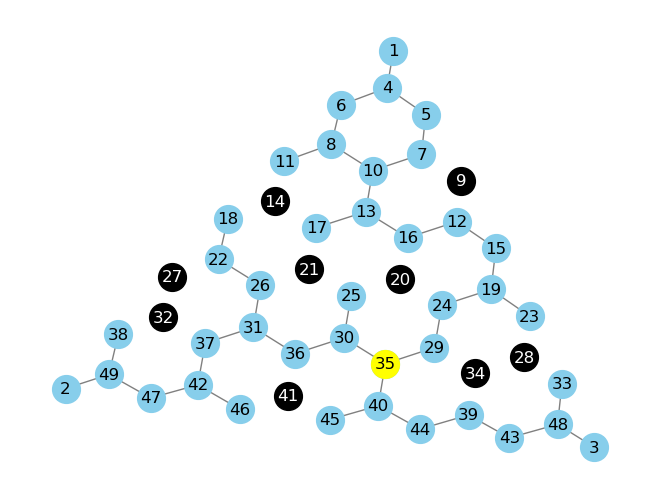

{'barriers': frozenset({32, 34, 41, 9, 14, 20, 21, 27, 28}), 'len12': 21, 'len13': 19, 'len23': 15, 'reward_path_lengths': [21, 19, 15], 'path_length_difference': 6, 'optimal_paths_12': [[1, 4, 5, 7, 10, 13, 16, 12, 15, 19, 24, 29, 35, 30, 36, 31, 37, 42, 47, 49, 2], [1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, 35, 30, 36, 31, 37, 42, 47, 49, 2]], 'optimal_paths_13': [[1, 4, 5, 7, 10, 13, 16, 12, 15, 19, 24, 29, 35, 40, 44, 39, 43, 48, 3], [1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, 35, 40, 44, 39, 43, 48, 3]], 'optimal_paths_23': [[2, 49, 47, 42, 37, 31, 36, 30, 35, 40, 44, 39, 43, 48, 3]], 'optimal_paths_all': [[1, 4, 5, 7, 10, 13, 16, 12, 15, 19, 24, 29, 35, 30, 36, 31, 37, 42, 47, 49, 2], [1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, 35, 30, 36, 31, 37, 42, 47, 49, 2], [1, 4, 5, 7, 10, 13, 16, 12, 15, 19, 24, 29, 35, 40, 44, 39, 43, 48, 3], [1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, 35, 40, 44, 39, 43, 48, 3], [2, 49, 47, 42, 37, 31, 36, 30, 35, 40, 44, 39, 43, 48, 3]], 'choice_p

In [11]:
# get a random maze config for testing
maze_config_list = list(good_mazes)

bars = maze_config_list[528]
# print it and visualize it
print(bars)
plot_hex_maze(bars)

# get attributes of this maze
atts = get_maze_attributes(bars)
print(atts)

In [27]:
def single_barrier_moved(set1, set2):
    ''' Check if two sets of barriers differ by only one element '''
    # Symmetric difference (XOR) between the sets has exactly two elements
    # because each set should have one barrier not present in the other set
    return len(set1.symmetric_difference(set2)) == 2

# Start with an valid config
original_barriers = df['barriers'][0]
print(original_barriers)

# Find other configs that differ by the movement of a single barrier
potential_new_barriers = [b for b in df['barriers'] if single_barrier_moved(b, original_barriers)]
print(potential_new_barriers)

# Now only get the ones where at least one path gets longer and one gets shorter
path_lengths_changed = any(a < b for a, b in zip(list1, list2)) and any(a > b for a, b in zip(list1, list2))



frozenset({37, 7, 39, 41, 14, 46, 20, 23, 30})
[frozenset({37, 7, 39, 14, 46, 18, 20, 23, 30}), frozenset({37, 7, 39, 41, 14, 18, 20, 23, 30}), frozenset({37, 7, 41, 45, 14, 46, 20, 23, 30}), frozenset({37, 39, 7, 41, 44, 14, 20, 23, 30}), frozenset({37, 39, 7, 46, 14, 20, 23, 25, 30}), frozenset({37, 7, 39, 42, 46, 14, 20, 23, 30}), frozenset({37, 7, 41, 44, 14, 46, 20, 23, 30}), frozenset({36, 37, 7, 41, 46, 14, 20, 23, 30}), frozenset({37, 7, 39, 44, 46, 14, 20, 23, 30}), frozenset({37, 7, 41, 46, 14, 20, 23, 25, 30}), frozenset({37, 7, 41, 14, 46, 20, 23, 28, 30}), frozenset({37, 7, 39, 11, 46, 14, 20, 23, 30}), frozenset({37, 7, 39, 41, 11, 14, 20, 23, 30}), frozenset({37, 39, 7, 14, 15, 46, 20, 23, 30}), frozenset({37, 39, 7, 45, 14, 46, 20, 23, 30}), frozenset({35, 37, 39, 7, 46, 14, 20, 23, 30}), frozenset({37, 7, 39, 46, 14, 19, 20, 23, 30}), frozenset({37, 7, 9, 41, 14, 46, 20, 23, 30}), frozenset({37, 7, 41, 14, 46, 18, 20, 23, 30})]
